$\textbf{Student:}$ Carlos Daniel Fontes da Silva\
$\textbf{E-mail:}$ carlos.fontes@ee.ufcg.edu.br

# Assignment 3: Overlap-add method for convolution calculus

Be the signal $x(n) = \cos(2\pi n/21)$ that is added to the interference $\eta(n) = 0.2\cdot(-1)^n\delta(n)$, which results in $r(n) = x(n) + \eta(n)$. Do the convolution of $r(n)$ with the filter $h(n) = \dfrac{1}{2}\delta(0) + \dfrac{1}{2}\delta(1)$ using at least 5096 samples of $r(n)$ processed in blocks of $M_o = 128$. Plot, in a same graphic, $r(n)$ and the convolution result.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

In [2]:
N = 5096                   # Size of input signal
M = 128                    # Block size
L = 2                      # Size of impulse response of the filter
T = N + L - 1              # Size of the output signal
num_blocos = int(T/M) + 1 

In [3]:
n = np.linspace(0, N-1, N)   # Samples of the input signal
ny = np.linspace(0, T-1, T)  # Samples of the output signal

h = np.pad(np.linspace(0.5, 0.5, L), (0, M - 1), 'constant')  # Filter impulse response (padding apllied for the DFT)
x = np.cos(2*np.pi*n/21)                                      # Original input signal
i = 0.2*(-1)**n                                               # Interference signal
r = x + i                                                     # Original signal with the interference

y = np.zeros(T)                                               # Output signal

In [4]:
p = 0
for i in range(num_blocos):
    
    if(i == num_blocos - 1):                         # When it arrives to the final block, its size must change from 128 to 104
        M = T - (num_blocos - 1)*M - 1
        h = np.pad(np.linspace(0.5, 0.5, L), (0, M - 1), 'constant')
    
    r_m = np.pad(r[p:p+M], (0, L - 1), 'constant')   # Block of the input signal with size M
    aux = np.real(ifft(fft(r_m)*fft(h)))             
    y[p:p+M] = aux[0:M]
    
    if(i != 0):
        y[p:p+L-1] += soma                           # Only the last L-1 elements of the block are sumed to the beggining of the other
    
    soma = aux[M:M+L-1]
    p += M

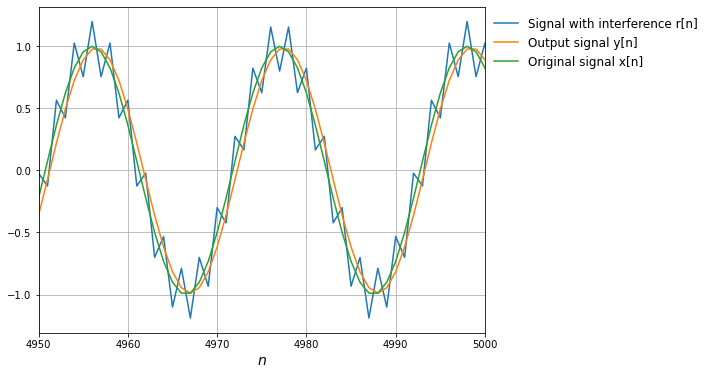

In [5]:
plt.figure(figsize = (8, 6))
plt.plot(n, r, label = 'Signal with interference r[n]')
plt.plot(ny, y, label = 'Output signal y[n]')
plt.plot(n, x, label = 'Original signal x[n]')
plt.xlabel('n', fontsize = 14, fontstyle = 'italic')
plt.xlim(4950,5000)
plt.legend(fontsize = 12, loc = 'upper right',bbox_to_anchor=(1.5,1), frameon = False)
plt.grid()

In [6]:
M = 128
h = np.pad(np.linspace(0.5, 0.5, L), (0, M - 1), 'constant')

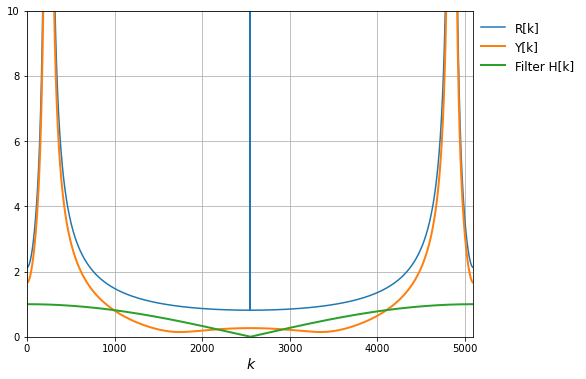

In [7]:
plt.figure(figsize = (8, 6))
plt.plot(n, abs(fft(r)), label = 'R[k]')
plt.plot(ny, np.abs(fft(y)),label = 'Y[k]', lw = 2)
plt.plot(ny, abs(fft(np.pad(h,(0,N-M)))), label = 'Filter H[k]',lw = 2)
plt.legend(fontsize = 12, bbox_to_anchor=(1.25,1), frameon = False)
plt.xlabel('k', fontsize = 14, fontstyle = 'italic')
plt.ylim(0, 10)
plt.xlim(0, N)
plt.grid()